<a href="https://colab.research.google.com/github/mharrisonbaker/DATA620/blob/main/DATA620_Week3_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week Three - Part 2 - Assignment Data Sets

Group Member: Bryan Persaud, Matthew Baker, Zhi Ying Chen

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1, Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2, Dataset.

3, Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

# Load Packages

The first step to analyzing this network is to import the packages necessary for the analysis. The first package we imported is matplotlib. This package is useful for displaying plots and figures in the python notebook. The second package we used is networkx. This package provides a comprehensive framework for loading, processing, and analyzing network data in python. The third package we imported is networkx.algorithms.bipartite, and this module provides functions and operations for bipartite graphs.

In [51]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd

# Data and Graphs

The Davis Southern Club Women data set is available here - http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat. This data set is also included with the NetworkX package. The data set here is included with the NetworkX package and it comes as a bipartite graph (clubs, women).

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women.

In [3]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

In [5]:
# Quick look at the dataset
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


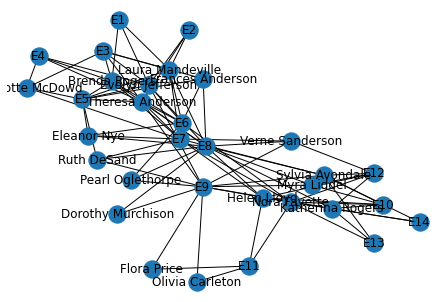

In [17]:
nx.draw(G, with_labels=True)
plt.show()

events E6, E7, E8 look like the most universally popular events

<Figure size 3600x3600 with 0 Axes>

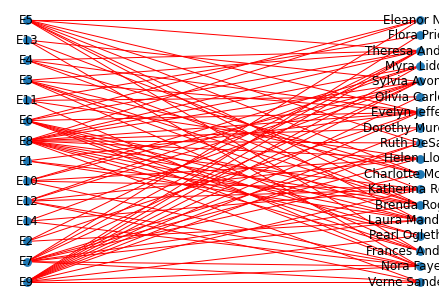

<Figure size 3600x3600 with 0 Axes>

In [34]:
#organize the bipartite graph, this shows which event each woman attended
Elist=["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10","E11","E12","E13","E14"]
top=nx.bipartite.sets(G)[0]
pos=nx.bipartite_layout(G, Elist)
D=nx.draw(G, pos=pos, with_labels=True, node_size=60, edge_color="red")
plt.figure(D, figsize=(50,50))

In [7]:
# list of women
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [8]:
# list of clubs
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [3]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


# Analysis part:

# Relationship between Women

In [12]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


The bipartite projection creates a connection between Southern Women if they participate in the same club/social event. Evelyn Jefferson and six other women had the same number of mutual club/social event connections (17).

In [39]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterised by a relatively high density of ties.

In [40]:
#Let's take a look and calculate the clustering coefficient for each woman.
Women_cluster  = pd.DataFrame(zip(nx.clustering(W).keys(), nx.clustering(W).values())).sort_values(by = [1], axis=0, ascending=True)
Women_cluster

,0,1
0,Evelyn Jefferson,0.897059
14,Helen Lloyd,0.897059
13,Nora Fayette,0.897059
12,Sylvia Avondale,0.897059
9,Verne Sanderson,0.897059
8,Ruth DeSand,0.897059
2,Theresa Anderson,0.897059
7,Pearl Oglethorpe,0.933333
10,Myra Liddel,0.933333
11,Katherina Rogers,0.933333


As you can see, all of these numbers are quite fairly high, ranging from 0.897 to 1.000. Again, from the conclusions that we had made above, it appears that these women overall appear closely knit with each other.

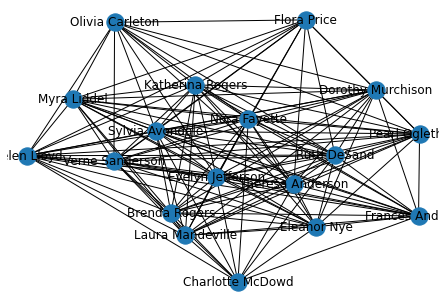

In [41]:
#visualize the projected representation (just for eye-checking the measures)
nx.draw(W, with_labels=True)
plt.show()

In [42]:
#which members are the most "central"
print(nx.degree_centrality(W))

{'Evelyn Jefferson': 1.0, 'Laura Mandeville': 0.8823529411764706, 'Theresa Anderson': 1.0, 'Brenda Rogers': 0.8823529411764706, 'Charlotte McDowd': 0.6470588235294118, 'Frances Anderson': 0.8823529411764706, 'Eleanor Nye': 0.8823529411764706, 'Pearl Oglethorpe': 0.9411764705882353, 'Ruth DeSand': 1.0, 'Verne Sanderson': 1.0, 'Myra Liddel': 0.9411764705882353, 'Katherina Rogers': 0.9411764705882353, 'Sylvia Avondale': 1.0, 'Nora Fayette': 1.0, 'Helen Lloyd': 1.0, 'Dorothy Murchison': 0.9411764705882353, 'Olivia Carleton': 0.7058823529411764, 'Flora Price': 0.7058823529411764}


In [43]:
#listing the maxmial cliques in the graph
list(nx.find_cliques(W))

[['Theresa Anderson',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Nora Fayette',
  'Helen Lloyd',
  'Charlotte McDowd',
  'Eleanor Nye',
  'Brenda Rogers',
  'Laura Mandeville',
  'Frances Anderson'],
 ['Theresa Anderson',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Nora Fayette',
  'Helen Lloyd',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Pearl Oglethorpe',
  'Myra Liddel',
  'Flora Price',
  'Olivia Carleton'],
 ['Theresa Anderson',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Nora Fayette',
  'Helen Lloyd',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Pearl Oglethorpe',
  'Myra Liddel',
  'Eleanor Nye',
  'Frances Anderson',
  'Laura Mandeville',
  'Brenda Rogers']]

# Relationship between Clubs

In [37]:
Events = bipartite.weighted_projected_graph(G, clubs)

print("Events, Connections")
for i in Events:
    print('%s %d' % (i, Events.degree(i)))

Events, Connections
E1 8
E2 8
E3 8
E4 8
E5 8
E6 13
E7 13
E8 13
E9 13
E10 8
E11 8
E12 8
E13 8
E14 8


In [22]:
#Let's take a look and calculate the clustering coefficient for each club.
Events_cluster = pd.DataFrame(zip(nx.clustering(Events).keys(), nx.clustering(Events).values())).sort_values(by = [1], axis=0, ascending=True)
Events_cluster

,0,1
5,E6,0.679487
6,E7,0.679487
7,E8,0.679487
8,E9,0.679487
0,E1,1.000000
1,E2,1.000000
2,E3,1.000000
3,E4,1.000000
4,E5,1.000000
9,E10,1.000000


As you can see, all of these numbers are quite fairly high, ranging from 0.679 to 1.000. As we had seen above, not everyone is as tight with each other.

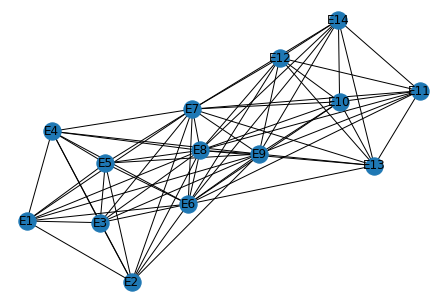

In [27]:
#visualize the projected representation (just for eye-checking the measures)
nx.draw(Events, with_labels=True)
plt.show()

In [38]:
#which members are the most "central"
print(nx.degree_centrality(Events))

{'E1': 0.6153846153846154, 'E2': 0.6153846153846154, 'E3': 0.6153846153846154, 'E4': 0.6153846153846154, 'E5': 0.6153846153846154, 'E6': 1.0, 'E7': 1.0, 'E8': 1.0, 'E9': 1.0, 'E10': 0.6153846153846154, 'E11': 0.6153846153846154, 'E12': 0.6153846153846154, 'E13': 0.6153846153846154, 'E14': 0.6153846153846154}


# Ego Networks

The neighborhood graph of a given graph from a vertex v is the subgraph induced by the neighborhood of a graph from vertex v, most commonly including v itself. Such graphs are sometimes also known in more recent literature as ego graphs or ego-centered networks. 

We want view connections related to one individual. So we compare a high-centrality node (Evelyn Jefferson) and a low-centrality node (Flora Price).

In [44]:
nx.ego_graph(G, 'Evelyn Jefferson')
ego_net=nx.ego_graph(G, 'Evelyn Jefferson')
print(nx.info(ego_net))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 8
Average degree:   1.7778


<Figure size 720x720 with 0 Axes>

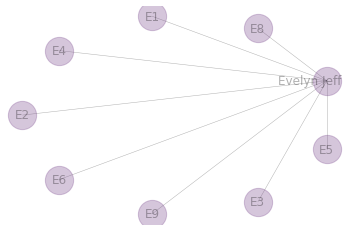

<Figure size 720x720 with 0 Axes>

In [47]:
pos=nx.shell_layout(ego_net)
nx.draw_networkx(ego_net, pos, alpha = .3, width=.5, node_size=800, node_color='#76448A')
plt.axis('off')
plt.figure(figsize = (10, 10))

In [48]:
nx.ego_graph(G, 'Flora Price')
ego_net2 = nx.ego_graph(G, 'Flora Price')
print(nx.info(ego_net2))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


<Figure size 720x720 with 0 Axes>

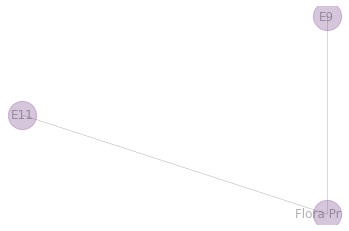

<Figure size 720x720 with 0 Axes>

In [49]:
pos=nx.shell_layout(ego_net2)
nx.draw_networkx(ego_net2, pos, alpha = .3, width=.5, node_size=800, node_color='#76448A')
plt.axis('off')
plt.figure(figsize = (10, 10))

From the above graph, we can see Flora Price had attended few events, and Evelyn Jefferson went to many social events.

# Conclusion

We can see that events and women are closely connected. There were no unconnected nodes. Evelyn Jefferson and six other women had the same number of mutual club/social event connections (17). 7 out of 18 women had a centrality measure of 0.010 or higher. 4 out of 14 events -- numbers E6, E7, E8 and E9-- had a centrality measure of 0.08 or higher. Strong centrality for these nodes was visible in the graph projections, as the nodes were centrally located and closely connected.